<class 'pandas.core.frame.DataFrame'>
Index: 539720 entries, 197 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539720 non-null  object 
 1   StockCode    539720 non-null  object 
 2   Description  539720 non-null  object 
 3   Quantity     539720 non-null  int64  
 4   InvoiceDate  539720 non-null  object 
 5   UnitPrice    539720 non-null  float64
 6   CustomerID   539720 non-null  float64
 7   Country      539720 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB
None
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
['Australia', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania

C:\Users\GANDI\AppData\Local\Temp\ipykernel_13872\779126398.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean_by_countries = df.groupby("Country").apply(lambda x : (x["UnitPrice"]*x["Quantity"]).mean())


['Belgium', 'Saudi Arabia', 'USA', 'United Kingdom']


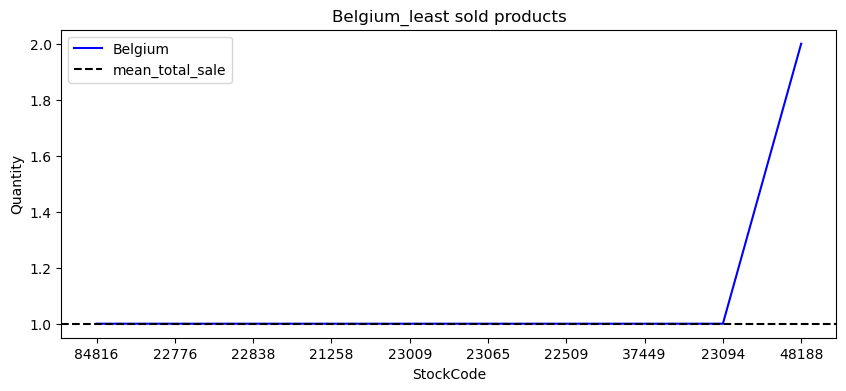

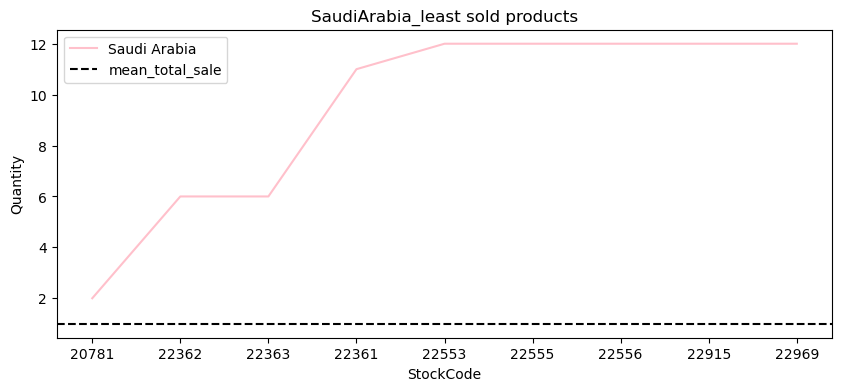

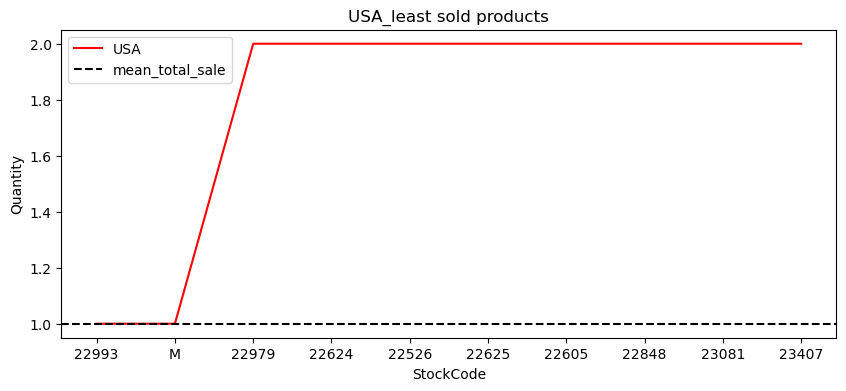

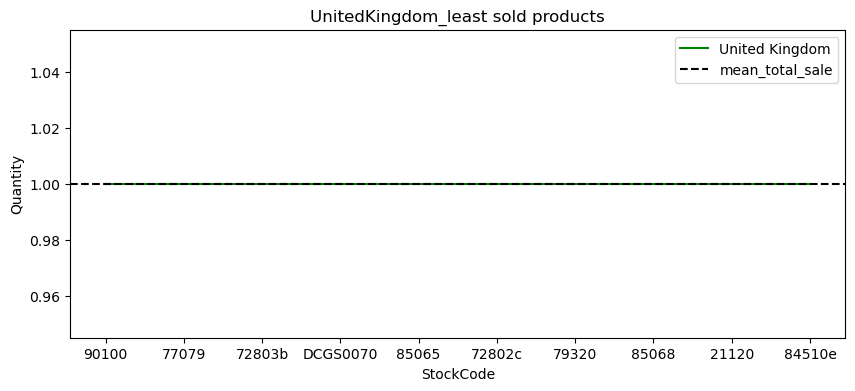

In [3]:
#libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#informationfile change to DataFrame
df =pd.read_csv("F:\\data.analiyz\\info.csv", encoding="latin1")
#print(df.info())
#cleaning code
#first step find wrong data and fixed,in column Quantity some data are negative change to posotive data
df["Quantity"] = np.where(df["Quantity"] < 0, -df["Quantity"], df["Quantity"])
#sime countries has spelling mistake,replace to spelling true
df["Country"] = df["Country"].replace({"Austria":"Australia","RSA":"USA"})
#second step fill NAN data,if amount of data is small we can deleted
df = df.dropna(subset="Description")
df = df[df["Country"] != "Unspecified"]
df = df.sort_values(["Country",'InvoiceNo'])
df["CustomerID"] = df.groupby("InvoiceNo")["CustomerID"].transform(lambda x: x.ffill().bfill())
df["CustomerID"] = df["CustomerID"].fillna(df.groupby("Country")["CustomerID"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))
df = df.dropna(subset="CustomerID")
print(df.info())
print(df.isna().sum())
#find name of Countries
countries =df["Country"].unique().tolist()
print(countries)
#Calculate the total average
mean_total_sale = (df["UnitPrice"]*df["Quantity"]).mean()
print(mean_total_sale)
#finding countries with the lowest sales
mean_by_countries = df.groupby("Country").apply(lambda x : (x["UnitPrice"]*x["Quantity"]).mean())
filtered_countries = mean_by_countries[mean_by_countries < mean_total_sale].index.tolist()
print(filtered_countries)
Belgium_least =df[df["Country"]=="Belgium"].groupby("StockCode")["Quantity"].sum().sort_values().head(10)
SaudiArabia_least =df[df["Country"]== "Saudi Arabia"].groupby("StockCode")["Quantity"].sum().sort_values().head(10)
USA_least =df[df["Country"]=="USA"].groupby("StockCode")["Quantity"].sum().sort_values().head(10)
UnitedKingdom_least =df[df["Country"] == "United Kingdom"].groupby("StockCode")["Quantity"].sum().sort_values().head(10)
#finding mean of 10 products with lowest sales in all sales
least10 = df.groupby("StockCode")["Quantity"].sum().sort_values().head(10)
mean_least10 = least10.mean()
#In countries that had sales below the global average, the ten data sets with the lowest sales in each country were compared with the ten data sets with the lowest sales in the total data set
#compare two mean together in plot
df[df["Country"] == "Belgium"]
plt.figure(figsize=(10, 4))
plt.plot(Belgium_least.index, Belgium_least.values, label = "Belgium", color="blue")
plt.axhline(y=mean_least10, color = "black", linestyle = "--", label ="mean_total_sale")
plt.legend()
plt.title("Belgium_least sold products")
plt.xlabel("StockCode")
plt.ylabel("Quantity")
df[df["Country"] == "Saudi Arabia"]
plt.figure(figsize=(10, 4))
plt.plot(SaudiArabia_least.index, SaudiArabia_least.values, label = "Saudi Arabia", color="pink")
plt.axhline(y=mean_least10, color = "black", linestyle = "--", label ="mean_total_sale")
plt.legend()
plt.title("SaudiArabia_least sold products")
plt.xlabel("StockCode")
plt.ylabel("Quantity")
USA = df[df["Country"] == "USA"]
plt.figure(figsize=(10, 4))
plt.plot(USA_least.index, USA_least.values, label = "USA", color="red")
plt.axhline(y=mean_least10, color = "black", linestyle = "--", label ="mean_total_sale")
plt.legend()
plt.title("USA_least sold products")
plt.xlabel("StockCode")
plt.ylabel("Quantity")
df[df["Country"] == "United Kingdom"]
plt.figure(figsize=(10, 4))
plt.plot(UnitedKingdom_least.index, UnitedKingdom_least.values, label = "United Kingdom", color="green")
plt.axhline(y=mean_least10, color = "black", linestyle = "--", label ="mean_total_sale")
plt.legend()
plt.title("UnitedKingdom_least sold products")
plt.xlabel("StockCode")
plt.ylabel("Quantity")
plt.show()
df.to_csv("cleaningcode.csv", index=False)






In [4]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
